Second Trial

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import zipfile


zip_path = "/content/drive/MyDrive/breast_cancer_img.zip"
extract_path = "/content/breast_cancer_dataset"

# Unzip
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extracted files to:", extract_path)


Extracted files to: /content/breast_cancer_dataset


In [ ]:
import zipfile

zip_path = "/content/drive/MyDrive/cancer_test_dataset.zip"
extract_path = "/content/breast_cancer_test_dataset"

# Unzip
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extracted files to:", extract_path)


Extracted files to: /content/breast_cancer_test_dataset


In [ ]:
!ls /content/breast_cancer_test_dataset


Breast_cancer_dataset.csv


In [ ]:
# List the contents of the extracted directory
!ls /content/breast_cancer_dataset

Dataset_BUSI_with_GT


In [ ]:
# List the contents of the Dataset_BUSI_with_GT directory
!ls /content/breast_cancer_dataset/Dataset_BUSI_with_GT

benign	malignant  normal



In the context of breast cancer images, the terms 'benign' and 'malignant' refer to the nature of any detected tumors or abnormalities:

*   **Benign:** A benign tumor is a non-cancerous growth. While they can still require treatment or monitoring, they do not invade surrounding tissues or spread to other parts of the body (metastasize). In the images, benign tumors might appear as well-defined masses.
*   **Malignant:** A malignant tumor is cancerous. These tumors have the ability to invade nearby tissues and spread to distant parts of the body through the bloodstream or lymphatic system. In the images, malignant tumors may appear as irregular or poorly defined masses.

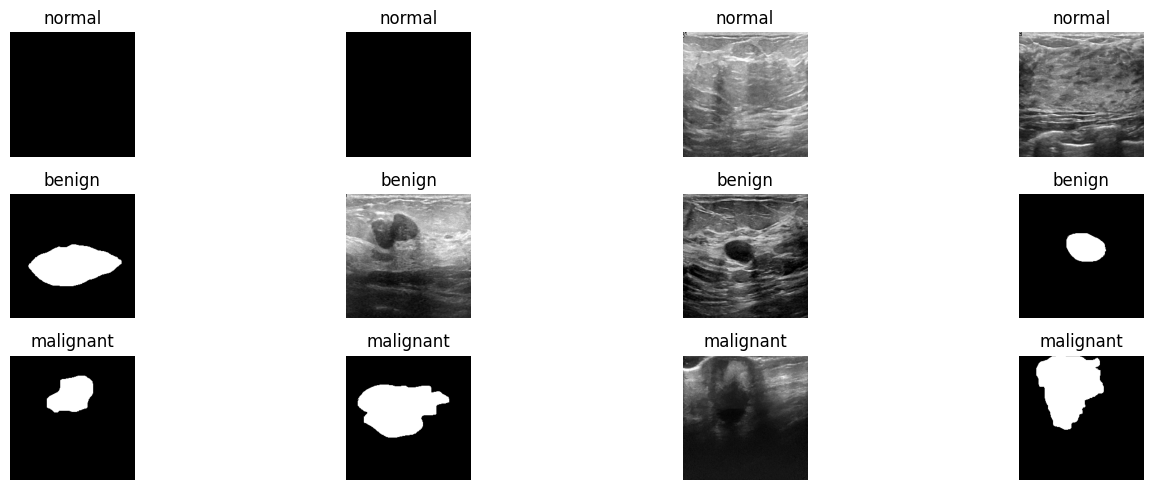

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# base directory
data_dir = '/content/breast_cancer_dataset/Dataset_BUSI_with_GT'

#  class labels
class_labels = ['normal', 'benign', 'malignant']

# Display sample images for each class
plt.figure(figsize=(15, 5))

for i, label in enumerate(class_labels):
    label_dir = os.path.join(data_dir, label)
    # Get image filenames
    image_files = os.listdir(label_dir)
    # Select a few sample images
    sample_images = image_files[:4]  # Display the first 4 images

    for j, image_file in enumerate(sample_images):
        image_path = os.path.join(label_dir, image_file)
        img = load_img(image_path, target_size=(224, 224))
        img_array = img_to_array(img) / 255.0  # Normalize

        plt.subplot(len(class_labels), 4, i * 4 + j + 1)
        plt.imshow(img_array)
        plt.title(label)
        plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
import os
import pandas as pd


# Create lists to store image paths and labels
image_paths = []
labels = []

# Iterate through the subdirectories (labels)
for label in os.listdir(data_dir):
    label_dir = os.path.join(data_dir, label)

    # Ensure it's a directory
    if os.path.isdir(label_dir):
        # Iterate through the images in each subdirectory
        for image_file in os.listdir(label_dir):
            # Construct the full image path
            image_path = os.path.join(label_dir, image_file)
            # Append the image path and label to the lists
            image_paths.append(image_path)
            labels.append(label)

# Create a pandas DataFrame
df_dataset = pd.DataFrame({'full_path': image_paths, 'label': labels})

# Display the first few rows and the distribution of labels
print(df_dataset.head())
print("\nLabel distribution:")
print(df_dataset['label'].value_counts())

                                           full_path      label
0  /content/breast_cancer_dataset/Dataset_BUSI_wi...  malignant
1  /content/breast_cancer_dataset/Dataset_BUSI_wi...  malignant
2  /content/breast_cancer_dataset/Dataset_BUSI_wi...  malignant
3  /content/breast_cancer_dataset/Dataset_BUSI_wi...  malignant
4  /content/breast_cancer_dataset/Dataset_BUSI_wi...  malignant

Label distribution:
label
benign       891
malignant    421
normal       266
Name: count, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split

# Split into train/validation sets (stratified)
train_df, val_df = train_test_split(
    df_dataset,
    test_size=0.2,
    stratify=df_dataset['label'],
    random_state=42
)

print(f"Train images: {len(train_df)}, Validation images: {len(val_df)}")
print("\nTrain label distribution:")
print(train_df['label'].value_counts())
print("\nValidation label distribution:")
print(val_df['label'].value_counts())

Train images: 1262, Validation images: 316

Train label distribution:
label
benign       712
malignant    337
normal       213
Name: count, dtype: int64

Validation label distribution:
label
benign       179
malignant     84
normal        53
Name: count, dtype: int64


In [ ]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
#  ImageDataGenerator for preprocessing and augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,          # normalize pixel values
    rotation_range=20,       # rotate images randomly
    width_shift_range=0.1,   # horizontal shift
    height_shift_range=0.1,  # vertical shift
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
val_datagen = ImageDataGenerator(
    rescale=1./255
)

#  Flow from dataframe
train_generator = train_datagen.flow_from_dataframe(
    train_df,
    x_col='full_path',
    y_col='label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True
)

val_generator = val_datagen.flow_from_dataframe(
    val_df,
    x_col='full_path',
    y_col='label',
    target_size=(224, 224),   # resize images to 224x224
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 1262 validated image filenames belonging to 3 classes.
Found 316 validated image filenames belonging to 3 classes.


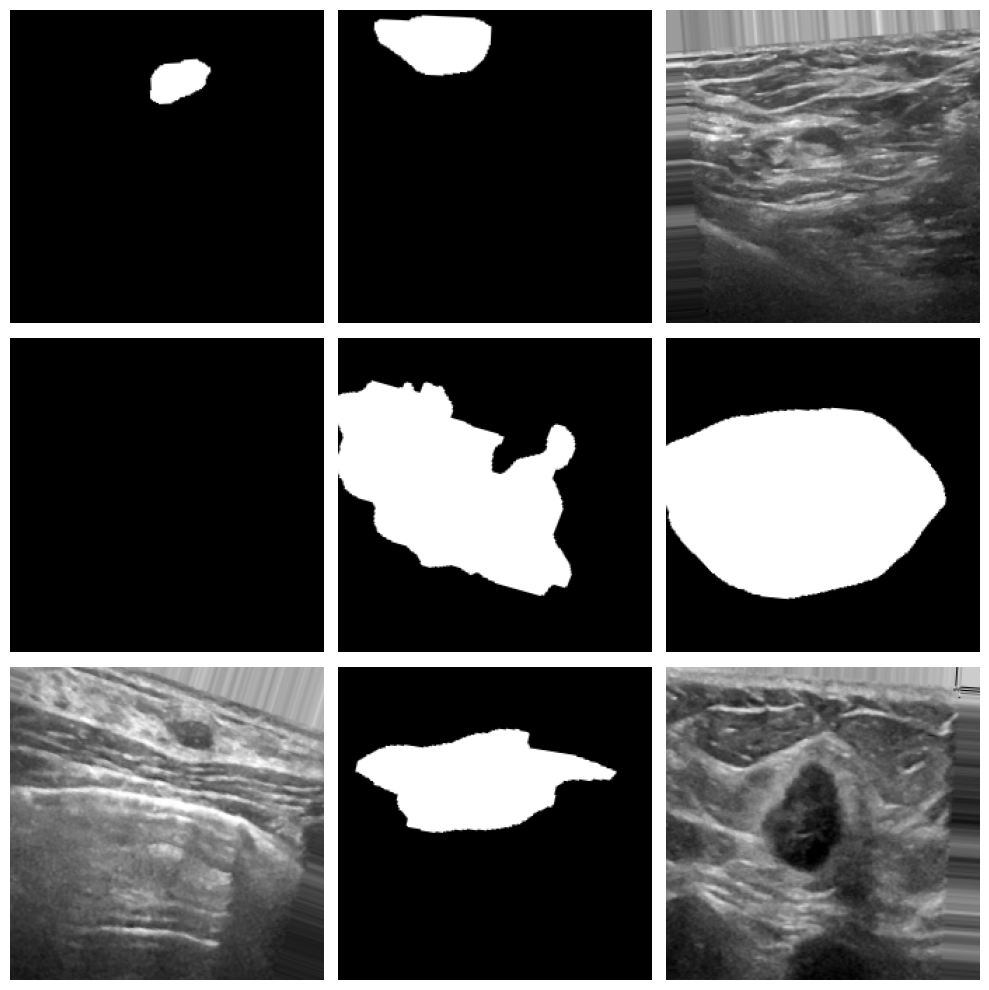

In [ ]:
# Get a batch of augmented images from the training generator
augmented_images, _ = next(train_generator)

# Display a few augmented images
plt.figure(figsize=(10, 10))
for i in range(9): # Display 9 augmented images
    plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models

# Define the base model (using MobileNetV2 for transfer learning)
base_model = MobileNetV2(
    input_shape=(224, 224, 3),  # Match image size and color mode
    include_top=False,          # Exclude the original classifier
    weights='imagenet'          # Use pretrained ImageNet weights
)

base_model.trainable = False  # Freeze the base model initially

# Add custom classifier on top
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(train_generator.class_indices), activation='softmax')  # Output layer with number of classes and softmax activation
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,339 (9.24 MB)

 Trainable params: 164,355 (642.01 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10 # Start with a smaller number of epochs
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.6677 - loss: 0.8353 - val_accuracy: 0.8133 - val_loss: 0.3916
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - accuracy: 0.7917 - loss: 0.4820 - val_accuracy: 0.8259 - val_loss: 0.3541
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 48s 1s/step - accuracy: 0.8272 - loss: 0.3928 - val_accuracy: 0.8671 - val_loss: 0.3345
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.8312 - loss: 0.3743 - val_accuracy: 0.8608 - val_loss: 0.3211
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - accuracy: 0.8413 - loss: 0.3671 - val_accuracy: 0.8608 - val_loss: 0.3297
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 53s 1s/step - accuracy: 0.8409 - loss: 0.3445 - val_accuracy: 0.8196 - val_loss: 0.3931
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.8637 - loss: 0.3335 - val_accuracy: 0.8544 - val_loss: 0.3078
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 0.8366 - loss: 0.3553 - val_accuracy: 0.8734 - val_loss:

10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 900ms/step - accuracy: 0.8332 - loss: 0.3873
Validation Loss: 0.3375
Validation Accuracy: 0.8576


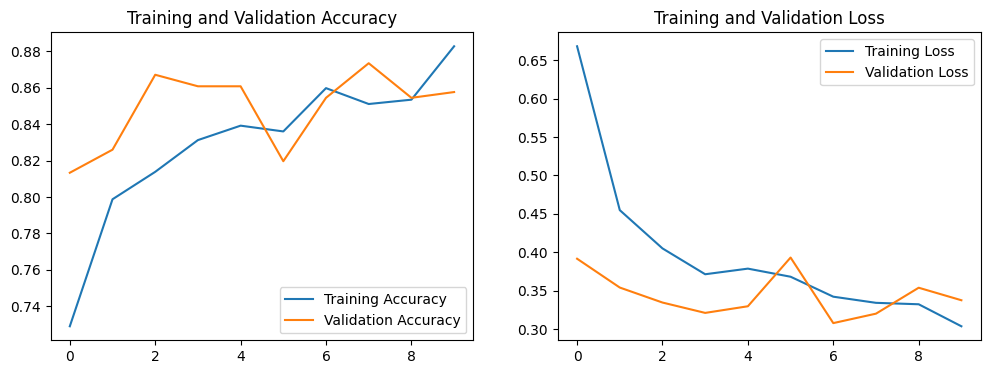

In [ ]:
# Evaluate the model on the validation set
loss, accuracy = model.evaluate(val_generator)
print(f"Validation Loss: {loss:.4f}")
print(f"Validation Accuracy: {accuracy:.4f}")

# Visualize training history
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
from sklearn.metrics import log_loss

# Get the true labels (one-hot encoded)
val_true_labels = tf.keras.utils.to_categorical(val_labels, num_classes=len(class_names))

# Calculate Log Loss
logloss = log_loss(val_true_labels, val_pred_probs)

print(f"Log Loss on Validation Set: {logloss:.4f}")

# This code calculates the Log Loss (also known as Cross-Entropy Loss) for the model's predictions on the validation set.
# What it does: It compares the predicted probabilities from the model (val_pred_probs) with the actual true labels (val_true_labels)
# and quantifies the difference.
# What it means: A lower Log Loss indicates that the model's predicted probabilities are closer to the true labels, meaning the model is more confident and accurate in its predictions.
# Why we use it: Log Loss is commonly used as an evaluation metric for classification models, particularly those that output probabilities.
# It penalizes incorrect predictions more heavily when the model is confident in its incorrect prediction, providing a good measure of the model's overall performance and calibration.

Log Loss on Validation Set: 0.3375


In [ ]:
import os

# path to save the model
save_dir = '/content/saved_models'
os.makedirs(save_dir, exist_ok=True)
model_save_path = os.path.join(save_dir, 'breast_cancer_cnn_model.h5')

# Save the trained model
model.save(model_save_path)

print(f"Model saved to: {model_save_path}")

Model saved to: /content/saved_models/breast_cancer_cnn_model.h5


# Task
Test the trained model with new images.

## Load new images

### Subtask:
Load the new images you want to use for testing.


**Reasoning**:
Define the directory containing the new images and create a list of image paths within that directory.



In [ ]:

new_images_dir = '/content/breast_cancer_dataset/Dataset_BUSI_with_GT/normal'

new_image_files = os.listdir(new_images_dir)
new_image_paths = [os.path.join(new_images_dir, f) for f in new_image_files if os.path.isfile(os.path.join(new_images_dir, f))]

print(f"Found {len(new_image_paths)} new images for testing.")
print(new_image_paths[:5])

Found 266 new images for testing.
['/content/breast_cancer_dataset/Dataset_BUSI_with_GT/normal/normal (16)_mask.png', '/content/breast_cancer_dataset/Dataset_BUSI_with_GT/normal/normal (101)_mask.png', '/content/breast_cancer_dataset/Dataset_BUSI_with_GT/normal/normal (117).png', '/content/breast_cancer_dataset/Dataset_BUSI_with_GT/normal/normal (127).png', '/content/breast_cancer_dataset/Dataset_BUSI_with_GT/normal/normal (92)_mask.png']


## Preprocess new images

### Subtask:
Apply the same preprocessing steps (resizing, normalization, etc.) to the new images as were applied to the training data.


**Reasoning**:
Apply the same preprocessing steps to the new images as were applied to the training data by iterating through the image paths, loading, converting, normalizing, and collecting the images into a NumPy array.



In [ ]:
# Apply the same preprocessing steps to the new images
preprocessed_new_images = []
for image_path in new_image_paths:
    img = load_img(image_path, target_size=(224, 224), color_mode='rgb')
    img_array = img_to_array(img) / 255.0  # Normalize
    preprocessed_new_images.append(img_array)

preprocessed_new_images = tf.stack(preprocessed_new_images, axis=0).numpy()

print(f"Shape of preprocessed new images: {preprocessed_new_images.shape}")

Shape of preprocessed new images: (266, 224, 224, 3)


## Make predictions

### Subtask:
Use the trained model to predict the class labels for the new images.


**Reasoning**:
Use the trained model to predict the class labels for the preprocessed new images.



In [ ]:
# Use the trained model to predict the class labels for the new images
predictions = model.predict(preprocessed_new_images)

# Print the shape of the predictions
print(f"Shape of predictions: {predictions.shape}")

9/9 ━━━━━━━━━━━━━━━━━━━━ 8s 775ms/step
Shape of predictions: (266, 3)


## Interpret predictions

### Subtask:
Display the predicted labels for each of the new images.


**Reasoning**:
Get the class names from the train_generator, determine the predicted class index, map the index to the class name, and print the image path and predicted label for each new image.



In [ ]:
# Get the class names from the train_generator
class_names = list(train_generator.class_indices.keys())

# Determine the predicted class index for each image
predicted_class_indices = tf.argmax(predictions, axis=1).numpy()

# Map the predicted class index to the corresponding class name and print
print("\nPredictions for new images:")
for i, image_path in enumerate(new_image_paths):
    predicted_label = class_names[predicted_class_indices[i]]
    print(f"Image: {os.path.basename(image_path)}, Predicted Label: {predicted_label}")


Predictions for new images:
Image: normal (16)_mask.png, Predicted Label: normal
Image: normal (101)_mask.png, Predicted Label: normal
Image: normal (117).png, Predicted Label: malignant
Image: normal (127).png, Predicted Label: normal
Image: normal (92)_mask.png, Predicted Label: normal
Image: normal (8)_mask.png, Predicted Label: normal
Image: normal (78)_mask.png, Predicted Label: normal
Image: normal (124)_mask.png, Predicted Label: normal
Image: normal (86)_mask.png, Predicted Label: normal
Image: normal (104).png, Predicted Label: normal
Image: normal (103)_mask.png, Predicted Label: normal
Image: normal (80)_mask.png, Predicted Label: normal
Image: normal (7).png, Predicted Label: normal
Image: normal (102)_mask.png, Predicted Label: normal
Image: normal (114)_mask.png, Predicted Label: normal
Image: normal (120)_mask.png, Predicted Label: normal
Image: normal (57)_mask.png, Predicted Label: normal
Image: normal (40).png, Predicted Label: normal
Image: normal (105).png, Predict

## Summary:

### Data Analysis Key Findings

*   266 new images were loaded from the specified directory `/content/breast_cancer_dataset/Dataset_BUSI_with_GT/normal`.
*   The new images were successfully preprocessed by resizing to 224x224 pixels, converting to a NumPy array, and normalizing the pixel values, resulting in a NumPy array with the shape (266, 224, 224, 3).
*   The trained model generated predictions for the 266 preprocessed images, resulting in a predictions array with the shape (266, 3), where each row represents the model's probability distribution across the three classes.
*   The predicted class labels for each of the new images were displayed, indicating the model's classification (normal, malignant, or benign).

### Insights or Next Steps

*   Since the test images loaded were all from the 'normal' class, evaluating the model's performance specifically on this class would provide valuable insights into its accuracy for normal cases.
*   To thoroughly test the model, repeat this process with new images from the 'malignant' and 'benign' classes to assess its performance across all categories.
